# Four Different Clustering on Wine-dataset

Changhee Han
Dong Chan Ryu
Kyungje Kim
Seong Ug Kim

In [1]:
import sklearn as sks
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import OPTICS
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors



## Loading the Dataset 

In [2]:
data = pd.read_csv('wine-clustering.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Normalizing the data

In [3]:
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

In [4]:
pca = PCA(n_components=10)
new_df = pd.DataFrame(pca.fit_transform(data_std), columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10"])

## 1. Hierarchical Clustering 

In [5]:
for n_clusters in range(2,11):
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(new_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(new_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.27203259421573633
For n_clusters = 3 The average silhouette_score is : 0.2839520778138405
For n_clusters = 4 The average silhouette_score is : 0.22505552510993881
For n_clusters = 5 The average silhouette_score is : 0.2237821350841438
For n_clusters = 6 The average silhouette_score is : 0.20549145190850748
For n_clusters = 7 The average silhouette_score is : 0.2088652526048183
For n_clusters = 8 The average silhouette_score is : 0.2045334074847247
For n_clusters = 9 The average silhouette_score is : 0.20948111846843065
For n_clusters = 10 The average silhouette_score is : 0.15183747489940155


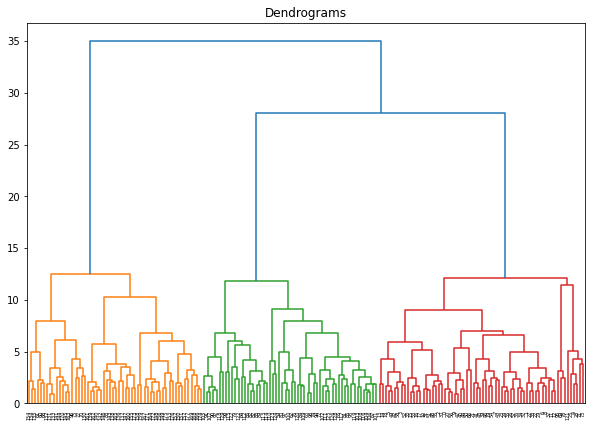

In [6]:
plt.figure(figsize=(10,7))  
plt.title("Dendrograms")  
dend = dendrogram(linkage(new_df, method='ward'))

In [7]:
clusterer = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_labels = clusterer.fit_predict(new_df)
new_df["Cluster Labels"] = cluster_labels

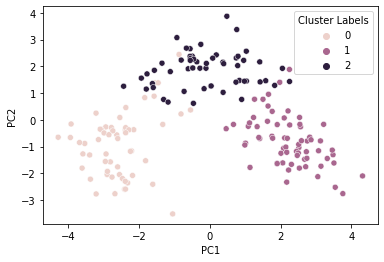

In [8]:
sns.scatterplot(data=new_df, x="PC1", y="PC2", hue="Cluster Labels")
plt.show()

## 2. K-means  

In [9]:
pca = PCA(n_components=10)
transformed_data = pca.fit_transform(data_std)
print(sum(pca.explained_variance_ratio_))

0.9616971684450644


In [10]:
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i).fit(transformed_data)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    score = silhouette_score(transformed_data, labels)
    print(score)

0.27933210955562227
0.29867482943692875
0.2596633960473988
0.2433226836533712
0.21361123673264298
0.19853455669525663
0.16507672219899303
0.16164712534834697


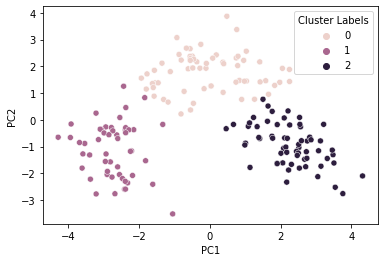

In [11]:
# best parameters: k = 3
new_df = pd.DataFrame(pca.fit_transform(data_std), columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10"])
kmeans = KMeans(n_clusters = 3).fit(transformed_data)
new_df["Cluster Labels"] = kmeans.labels_
sns.scatterplot(data=new_df, x="PC1", y="PC2", hue="Cluster Labels")
plt.show()

## 3. OPTICS 

In [12]:
clustering = OPTICS().fit(transformed_data)
labels = clustering.labels_

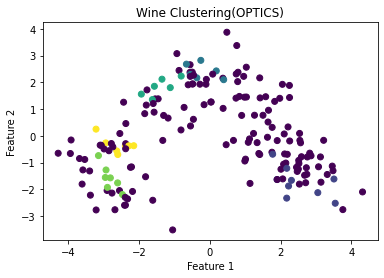

In [13]:
# Plot the clusters using a scatter plot
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c = labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Wine Clustering(OPTICS)')
plt.show()

In [14]:
silhouette_avg = silhouette_score(data_std, labels)
sample_silhouette_values = silhouette_samples(data_std, labels)

In [15]:
silhouette_avg

-0.21299425190764792

In [16]:
sample_silhouette_values

array([-0.41106484, -0.2428277 , -0.38438362, -0.5208437 , -0.24262342,
        0.60909884, -0.41541848, -0.46704013, -0.35586324, -0.40720047,
       -0.47837761, -0.34760706, -0.4412735 , -0.3631703 , -0.4507662 ,
        0.57509162,  0.53461173,  0.53698243,  0.56572098, -0.30432289,
       -0.33318901, -0.10379918, -0.30929173, -0.21900981, -0.20337272,
       -0.16946155,  0.40089564, -0.21294635, -0.42244453, -0.27510896,
       -0.44839021, -0.52516447, -0.30550811, -0.44464011, -0.38441031,
       -0.28927929, -0.37000432, -0.30646611, -0.23959674, -0.25459144,
       -0.35406072, -0.14445338, -0.44645197, -0.05125531, -0.22223295,
       -0.28619483, -0.35060237, -0.33446727, -0.42977799, -0.52523898,
       -0.23655829, -0.42130741,  0.51239003,  0.61760676, -0.36576386,
       -0.39127386, -0.43766925,  0.56894577, -0.53463428, -0.31513188,
       -0.32109284, -0.28789224, -0.35982479, -0.25267112, -0.38927124,
       -0.2258583 , -0.29412471,  0.42117031, -0.18491221, -0.11

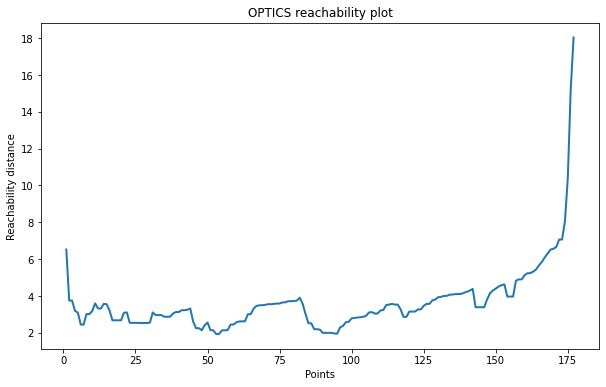

In [17]:
# Plotting the reachability plot
X = data.iloc[:, :-1]
clustering = OPTICS(min_samples=5, eps=0.5).fit(X)
# Plot the reachability distance plot
space = np.arange(len(X))
reachability = clustering.reachability_[clustering.ordering_]
reachability[clustering.ordering_ == -1] = np.inf
plt.figure(figsize=(10, 6))
plt.plot(space, reachability, linewidth=2)
plt.xlabel("Points")
plt.ylabel("Reachability distance")
plt.title("OPTICS reachability plot")
plt.show()

## 4. DBscan 

In [18]:
# Data preprocssing
df = pd.read_csv('wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [19]:
df.shape

(178, 13)

In [20]:
df2 = df.copy()
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df2)

In [21]:
pca = PCA(n_components=10)
pca_data = pca.fit_transform(normalized_data)

In [22]:
pca_data_DBscan = pca_data.copy()

In [23]:
# K-distance graph
nn = NearestNeighbors(n_neighbors=11)
nbrs = nn.fit(pca_data_DBscan)
distances, indices = nbrs.kneighbors(pca_data_DBscan)

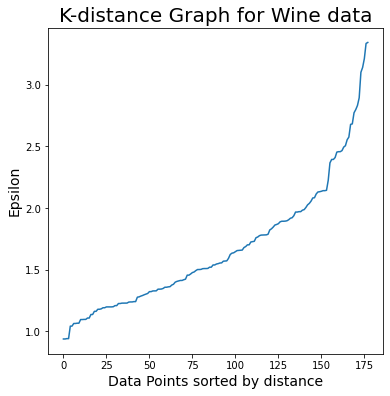

In [24]:
# plotting
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.figure(figsize=(6, 6))
plt.plot(distances)
plt.title("K-distance Graph for Wine data", fontsize=20)
plt.xlabel("Data Points sorted by distance", fontsize=14)
plt.ylabel("Epsilon", fontsize=14)
plt.show()

- The optimum value of epsilon is at the point of maximum curvature in the K-distance Graph, which is 2.2
- For MinPts I choose 11 (dimension + 1)

In [25]:
# Training DBscan clustering model on the dataset
dbscan = DBSCAN(eps=2.2, min_samples=11, metric='euclidean')
model = dbscan.fit_predict(pca_data_DBscan)
model

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1,  0, -1,  0,
       -1, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1,  0,  0,  0,  1, -1,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0, -1, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0, -1, -1,  0, -1,  0,  0, -1,  0,  0, -1,
        0,  0, -1, -1, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1,
        1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1, -1,  1])

In [26]:
df['DBSCAN_Cluster'] = model
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,DBSCAN_Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [29]:
score = silhouette_score(pca_data_DBscan, dbscan.labels_, metric='euclidean')
print("Silhouette Average Score: %.3f" % score)

Silhouette Average Score: 0.113


<function matplotlib.pyplot.show(close=None, block=None)>

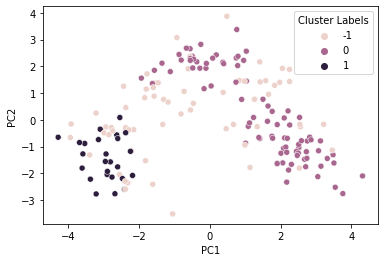

In [30]:
new_df = pd.DataFrame(pca_data_DBscan, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10"])
new_df['Cluster Labels'] = model
sns.scatterplot(data=new_df, x="PC1", y="PC2", hue="Cluster Labels")
plt.show             